In [51]:
# Name:- Rohit Kumar
# Roll_No:- 25901334
# Model:- KNN Regression

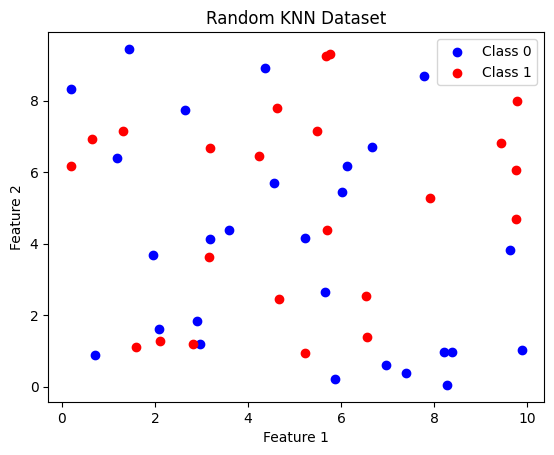

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

np.random.seed(0)  # for reproducibility

# Generate 50 random 2D points (features between 0 and 10)
X = np.random.uniform(0, 10, (50, 2))

# Generate random binary labels (0 or 1)
y = np.random.randint(0, 2, 50)

# Visualize the dataset
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random KNN Dataset")
plt.legend()
plt.show()

In [58]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def knn_predict(X_train, y_train, x_test, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((dist, y_train[i]))

    # Sort by distance
    distances.sort(key=lambda x: x[0])

    # Take k nearest neighbors
    neighbors = distances[:k]

    # Voting
    classes = [label for _, label in neighbors]
    vote = Counter(classes).most_common(1)[0][0]
    return vote

In [59]:
# Generate 5 random test points
test_points = np.random.uniform(0, 10, (5, 2))

# Predict classes
for point in test_points:
    pred = knn_predict(X, y, point, k=3)
    print(f"Test point {point} predicted class: {pred}")

Test point [6.06393214 0.19193198] predicted class: 0
Test point [3.01574817 6.60173537] predicted class: 1
Test point [2.90077607 6.18015429] predicted class: 1
Test point [4.28768701 1.35474064] predicted class: 1
Test point [2.98282326 5.69964911] predicted class: 1


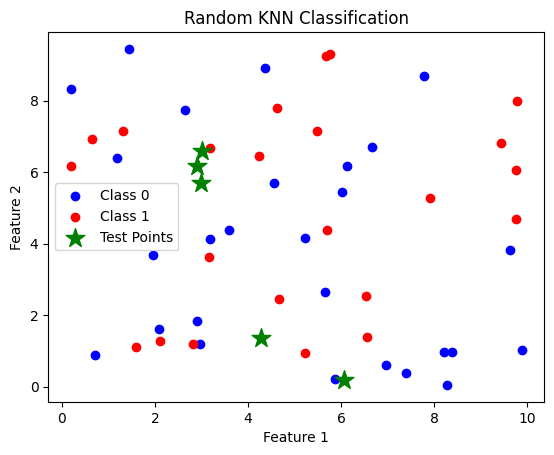

In [61]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')
plt.scatter(test_points[:,0], test_points[:,1], color='green', marker='*', s=200, label='Test Points')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random KNN Classification")
plt.legend()
plt.show()

In [63]:
# Predict on training points
y_pred_train = np.array([knn_predict(X, y, X[i], k=3) for i in range(len(X))])

# Compute accuracy
accuracy = np.mean(y_pred_train == y)
print(f"Training accuracy: {accuracy*100:.2f}%")

Training accuracy: 74.00%
